# QUESTION
## In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class. Hint: import numpy as np import matplotlib.pyplot as plt from mpl_toolkits.mplot3d import Axes3D from sklearn import decomposition from sklearn import datasets

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names = ["sepal length", "sepal width", "petal length", "petal width", "target"])

In [102]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
X = df.iloc[:, :-1]
y = df.iloc[:, 4:]

In [104]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [105]:
y.head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [108]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
pricnipal = pca.fit_transform(X)

In [121]:
df1 = pd.DataFrame(data = pricnipal, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [131]:
df2 = pd.concat([df1, df[['target']]], axis = 1)

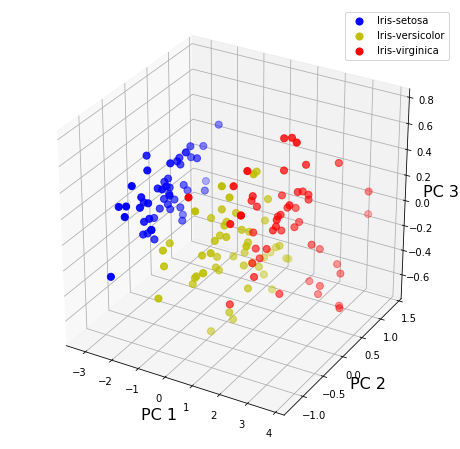

In [136]:
#create a figure
fig = plt.figure(figsize = (8,8))
sp = fig.add_subplot(111, projection='3d')
sp.set_xlabel('PC 1', fontsize = 16)
sp.set_ylabel('PC 2', fontsize = 16)
sp.set_zlabel('PC 3', fontsize = 16)

#set colors to the targert variable 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['b', 'y', 'r']

for target, color in zip(targets,colors):
    indices = df2['target'] == target
    sp.scatter(df2.loc[indices, 'principal component 1']
               , df2.loc[indices, 'principal component 2']
               , df2.loc[indices, 'principal component 3']
               , c = color
               , s = 50)
    
#plotting
sp.legend(targets)
sp.grid()
plt.show()